Setups

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.util import img_as_float

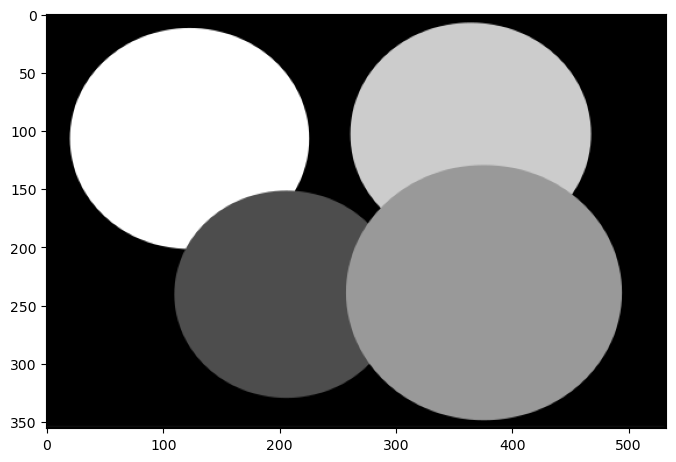

In [2]:
#load the pic.
image = img_as_float(io.imread('data/resources/circles.png'))
#plot
plt.figure(figsize = (8,10))
plt.imshow(image, cmap = 'gray')
plt.show()

Do the Thresholding to separate shapes

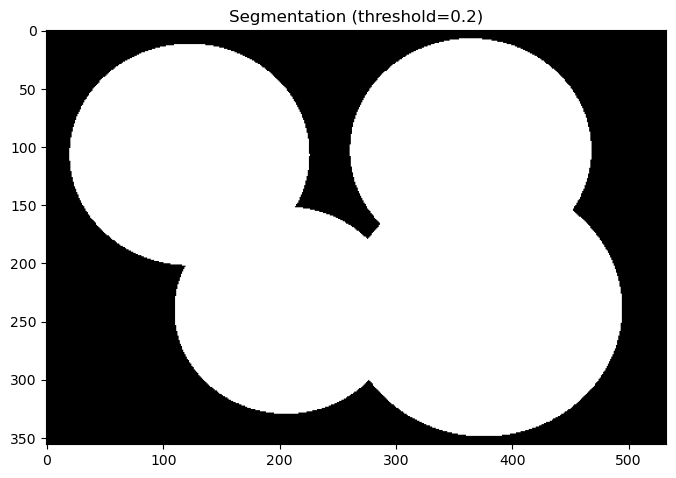

In [3]:
threshold = 0.2
segmentation = image >= threshold
#create a new pic save the pixels larger than the threshold
plt.figure(figsize=(8, 10))
plt.imshow(segmentation, cmap='gray')
plt.title(f"Segmentation ({threshold=})")
plt.show()

Different pixel values are set to be same, to prove, we can use Otsu Thresholding

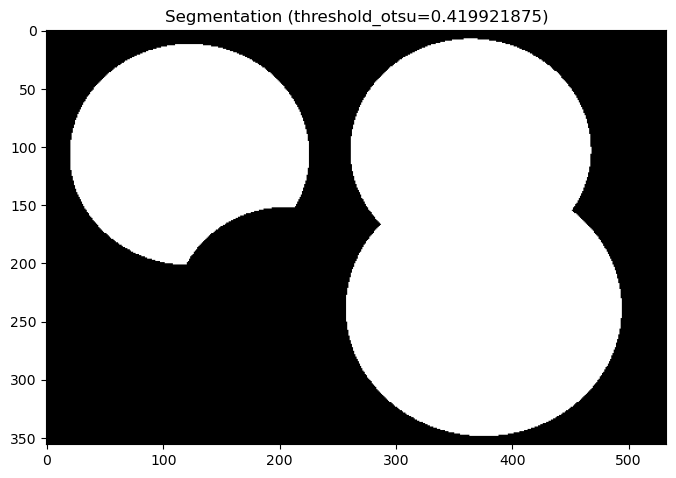

In [4]:
threshold_otsu = filters.threshold_otsu(image)
segmentation_otsu = image >= threshold_otsu
#plot
plt.figure(figsize=(8, 10))
plt.imshow(segmentation_otsu, cmap='gray')
plt.title(f"Segmentation ({threshold_otsu=})")
plt.show()

Better performance wit multi-Otsu

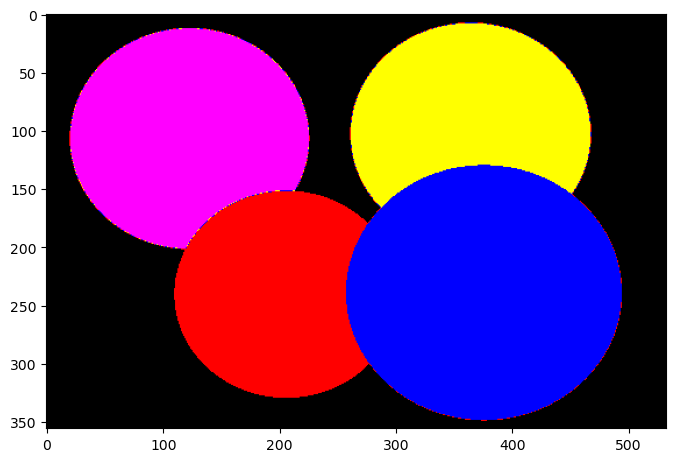

In [5]:
threshold_multiotsu = filters.threshold_multiotsu(image, classes=5)
#we have here 4 different threshold, can not directly do the segmentation
regions = np.digitize(image, bins=threshold_multiotsu)
#now different circles with different colors are set to different labels, returns label
segmentation_multiotsu = color.label2rgb(regions)
#set pixels with same labels to same colors(random colors)
#show
plt.figure(figsize=(8, 10))
plt.imshow(segmentation_multiotsu, cmap='gray')
plt.show()